> ## Importing Libraries

In [7]:
import pandas as pd # Data Loading and Manipulation
import seaborn as sns # Interactive Visualization
import matplotlib.pyplot as plt # Base visualization library
import numpy as np # for faster data calculations

import warnings
warnings.filterwarnings("ignore")# here we are ignoring the warnings

> ### Reading Excel file

In [8]:
df = pd.read_excel("Ecommerce_sales.xlsx")
df

,Month,Customer ID,Age,Gender,Income Group,Family size,Product category,Price,items
0,2019-01-01,83,29,F,2000-2500,6,Household,593,10
1,2019-01-01,87,33,F,1000-1500,2,Electronics,82,18
2,2019-01-01,92,30,M,<1000,1,Kitchen,478,14
3,2019-01-01,27,24,M,1500-2000,5,Beverages,442,1
4,2019-01-01,93,39,F,1000-1500,10,Appliances,310,9
...,...,...,...,...,...,...,...,...,...
637,2019-06-01,86,38,M,<1000,3,Appliances,49,19
638,2019-06-01,108,26,M,2500-3000,9,Furniture,476,2
639,2019-06-01,79,37,F,>3000,8,Beverages,396,18
640,2019-06-01,109,34,F,>3000,3,Appliances,245,24


#### Dataset information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Month             642 non-null    datetime64[ns]
 1   Customer ID       642 non-null    int64         
 2   Age               642 non-null    int64         
 3   Gender            642 non-null    object        
 4   Income Group      642 non-null    object        
 5   Family size       642 non-null    int64         
 6   Product category  642 non-null    object        
 7   Price             642 non-null    int64         
 8   items             642 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 45.3+ KB


### Required Problem Statements


    Q1: Find mean, median and mode of the variable "Age"of the customer? Hint: try using descriptive statistics from the data analysis panel									
    Q2: Which Income group of customers spends the most on purchases? Hint: Use descriptive statistics or pivot tables									
    Q3: Is there any relatioship between Family size and expenditure? Hint : Use correlation									
    Q4: Create a month wise sales distribution of Household products (Bar graph).									
    Q5:What is the average price of an item in Electronics?									
    Q6: Find difference between money spent per purchase by Male and Female?									


### Q1: Find mean, median and mode of the variable "Age"of the customer?
						

In [10]:
print("Mean of the Age variable is : ",df["Age"].mean())
print("Median of the Age variable is : ",df["Age"].median())
print("Mode of the Age variable is : ",df["Age"].mode())

Mean of the Age variable is :  37.39563862928349
Median of the Age variable is :  35.0
Mode of the Age variable is :  0    49
Name: Age, dtype: int64


### Pictorial representation of the Mean, Median and Mode

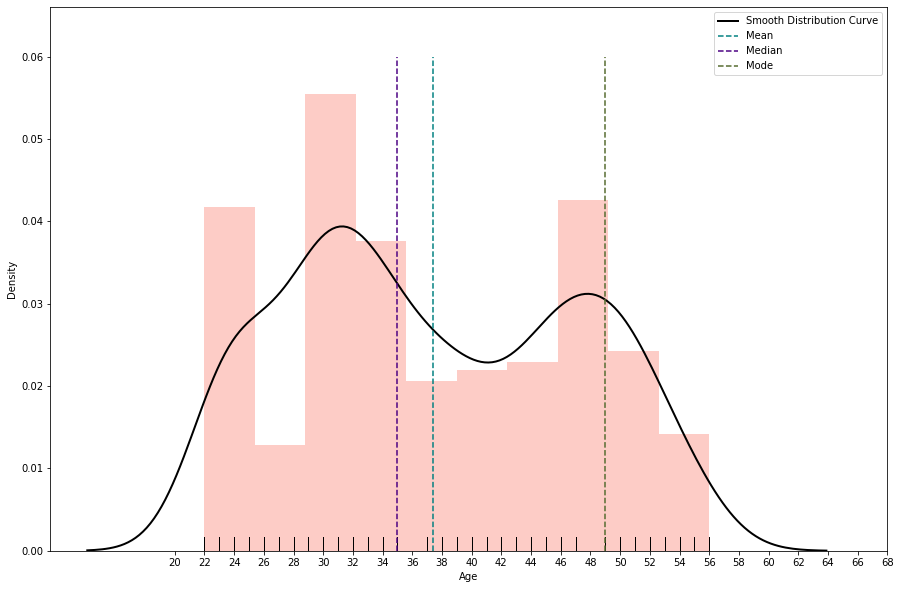

In [31]:
fig, ax = plt.subplots(figsize = (15,10))
sns.distplot(df["Age"], hist = True,color = "salmon", rug = True, rug_kws={"color": "black"},
            kde_kws={"color": "k", "lw": 2, "label": "Smooth Distribution Curve"})
plt.vlines(df["Age"].mean(), ymin = 0, ymax = 0.06, linestyles ='dashed', label = "Mean", color = "teal")
plt.vlines(df["Age"].median(), ymin = 0, ymax = 0.06, linestyles ='dashed', label = "Median", color = "indigo")
plt.vlines(df["Age"].mode(), ymin = 0, ymax = 0.06, linestyles ='dashed', label = "Mode", color = "darkolivegreen")
ax.set_xticks(range(20,70, 2))
plt.legend()

The mean,median,mode for the 'Age' variable are 37.39, 35.0 and,49 respectively

### Q2: Which Income group of customers spends the most on purchases? 
##### Hint: Use descriptive statistics or pivot tables									

In [12]:
df.groupby(['Income Group'])['Price'].mean().sort_values(ascending = False)

Income Group
>3000        377.903226
1000-1500    375.018692
2500-3000    363.563636
2000-2500    361.445455
1500-2000    357.565217
<1000        353.672897
Name: Price, dtype: float64

From above information >3000$ Income Group of customers spends the most on purchases. In average they are spending approximatly 378$ which is higher than the other income groups.

### Q3. Is there any relatioship between Family size and expenditure?

We can answer this question by drawing the scatter plot between Family size V/S Expenditure(Price).

Text(0.5, 1.0, 'Correlation between Family size and Expenditure')

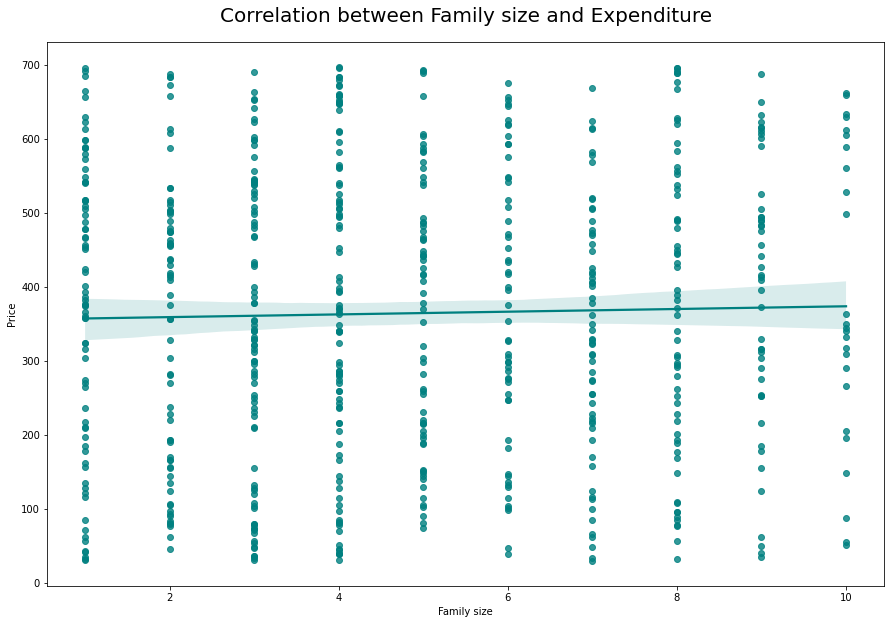

In [29]:
fig, ax = plt.subplots(figsize = (15,10))
sns.regplot(df["Family size"],df["Price"],color="teal")
plt.title("Correlation between Family size and Expenditure",pad=20,fontsize=20)


From the above corralation graph, we can say that,there is no any such relationship between Family size and Expenditure.

### Q4. Create a month wise sales distribution of Household products (Bar graph)?

To find the month wise sales distribution of Household products,first we have to extract month names from the date column(i.e,"Month" column)

In [14]:
df["Month"]=df['Month'].dt.month_name()
df

,Month,Customer ID,Age,Gender,Income Group,Family size,Product category,Price,items
0,January,83,29,F,2000-2500,6,Household,593,10
1,January,87,33,F,1000-1500,2,Electronics,82,18
2,January,92,30,M,<1000,1,Kitchen,478,14
3,January,27,24,M,1500-2000,5,Beverages,442,1
4,January,93,39,F,1000-1500,10,Appliances,310,9
...,...,...,...,...,...,...,...,...,...
637,June,86,38,M,<1000,3,Appliances,49,19
638,June,108,26,M,2500-3000,9,Furniture,476,2
639,June,79,37,F,>3000,8,Beverages,396,18
640,June,109,34,F,>3000,3,Appliances,245,24


In [15]:
df1=df[df["Product category"]=="Household"]
df1

,Month,Customer ID,Age,Gender,Income Group,Family size,Product category,Price,items
0,January,83,29,F,2000-2500,6,Household,593,10
10,January,128,30,F,>3000,7,Household,223,21
11,January,13,26,M,<1000,4,Household,71,7
12,January,26,24,F,1000-1500,9,Household,484,23
13,January,54,51,F,>3000,3,Household,105,13
...,...,...,...,...,...,...,...,...,...
613,June,20,29,F,1000-1500,7,Household,325,3
614,June,127,50,M,2500-3000,3,Household,520,21
624,June,70,39,F,2000-2500,1,Household,457,24
630,June,106,35,M,1500-2000,5,Household,256,10


Text(0.5, 1.0, 'Month wise sales distribution of Household products')

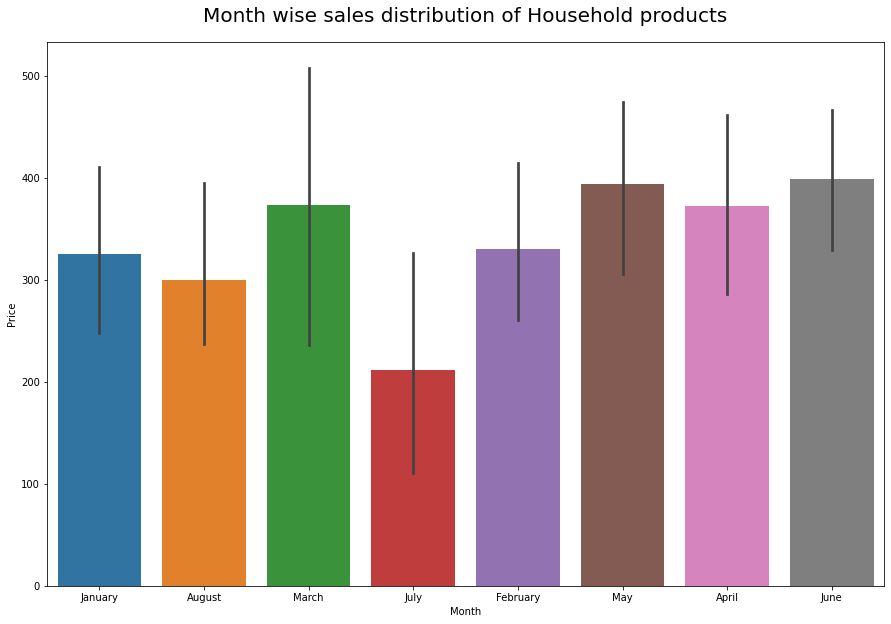

In [16]:
fig, ax = plt.subplots(figsize = (15,10))
sns.barplot(x = "Month", y= "Price",data=df1)
plt.title("Month wise sales distribution of Household products",pad=20,fontsize=20) 

Above bar graph gives the clear picture about the Month wise sales distribution of Household products.

we can observe that,we have great sales of Household products either in May or in June and in July month we can observe the less sales.

### Q5. What is the average price of an item in Electronics?

In [17]:
df[df["Product category"]=="Electronics"]["Price"].mean()

357.2517985611511

 the average price of an item in Electronics is :- 357.2517985611511

### Q6.Find difference between money spent per purchase by Male and Female?

In [18]:
df

,Month,Customer ID,Age,Gender,Income Group,Family size,Product category,Price,items
0,January,83,29,F,2000-2500,6,Household,593,10
1,January,87,33,F,1000-1500,2,Electronics,82,18
2,January,92,30,M,<1000,1,Kitchen,478,14
3,January,27,24,M,1500-2000,5,Beverages,442,1
4,January,93,39,F,1000-1500,10,Appliances,310,9
...,...,...,...,...,...,...,...,...,...
637,June,86,38,M,<1000,3,Appliances,49,19
638,June,108,26,M,2500-3000,9,Furniture,476,2
639,June,79,37,F,>3000,8,Beverages,396,18
640,June,109,34,F,>3000,3,Appliances,245,24


In [19]:
age_productWise_avgs = df.groupby(['Gender', 'Product category'])['Price'].mean()
df_age_productWise_avgs = pd.DataFrame(age_productWise_avgs)
df_age_productWise_avgs = df_age_productWise_avgs.reset_index(level = ['Gender','Product category'])
df_age_productWise_avgs

,Gender,Product category,Price
0,F,Appliances,370.830508
1,F,Beverages,370.194444
2,F,Electronics,375.677966
3,F,Furniture,375.560976
4,F,Household,379.396552
5,F,Kitchen,355.385965
6,M,Appliances,366.179487
7,M,Beverages,377.800000
8,M,Electronics,343.662500
9,M,Furniture,380.807692


Text(0.5, 1.0, 'Difference between money spent per purchase by Male and Female')

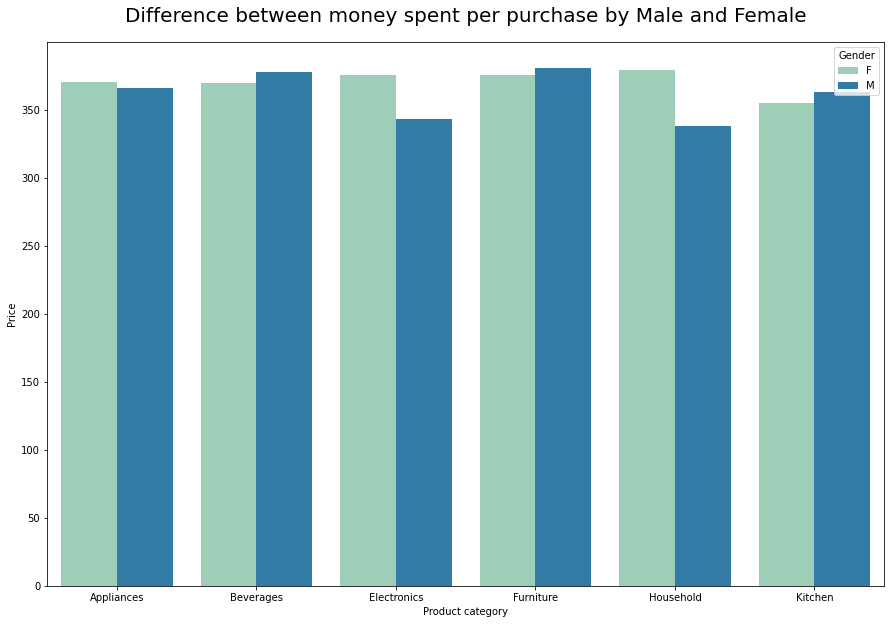

In [26]:
plt.figure(figsize = (15,10))
sns.barplot(x = "Product category", y= "Price", hue = "Gender", palette = "YlGnBu", data = df_age_productWise_avgs)
plt.title("Difference between money spent per purchase by Male and Female",pad=20,fontsize=20)

There are different types of Products noted in "Product Category" variable.

The above represented graph indicates that,how thw females and Males spending money on Product catrgories  
"Appliances","Beverages","Electronics","Furniture","Household" and "Kitchen"
 